In [14]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv('../data/ninja-trade/data.txt')

In [16]:
df

,close
0,13161.25
1,13161.00
2,13163.25
3,13163.50
4,13162.00
...,...
5514,13203.75
5515,13200.25
5516,13199.50
5517,13198.25


In [17]:

col = 'close'
period = 9
fishPrev = 0
tmpValuePrev = 0
Value = []
tmpSeries = []
for i, v in enumerate(df[col]):
    if i > 0:
        fishPrev = Value[-1]
        tmpValuePrev =  tmpSeries[-1]
    
    min = df[col].iloc[i-period:i+1].min()
    max = df[col].iloc[i-period:i+1].max()
    if np.isnan(max):
        if i == 0:
            min = v
            max = v
        else:
            min = df[col].iloc[:i+1].min()
            max = df[col].iloc[:i+1].max()
    minLo = min
    num1 = max - minLo
    if num1<0.01:
        num1=0.025
    tmpValue = 0.66 * ((v - minLo)/num1 - 0.5) + 0.67 * tmpValuePrev
    if tmpValue > 0.99:
        tmpValue = 0.999
    elif tmpValue < -0.99:
        tmpValue = -0.99
    
    tmpSeries.append(tmpValue)
    val = 0.5 * math.log((1+tmpValue)/(1-tmpValue)) + 0.5* fishPrev
    Value.append(val)

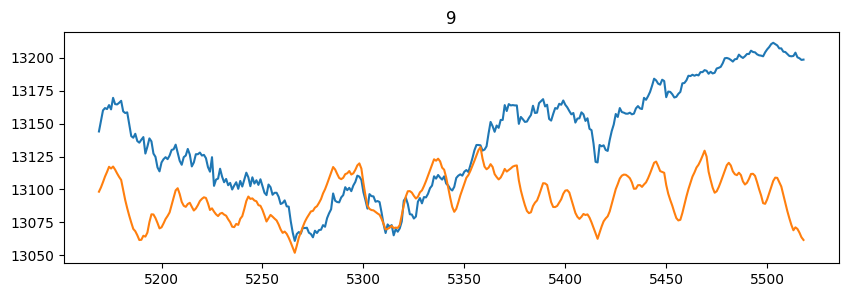

In [26]:
# adding the ft on same chart for fisual comparison with NT chart
vals = np.array(Value)*10+13090
df['ft'] = vals

Nback = 350
plt.figure(figsize=(10,3))
plt.plot(df['close'].iloc[-Nback:])
plt.plot(df['ft'].iloc[-Nback:])
plt.title(str(period))
plt.show()

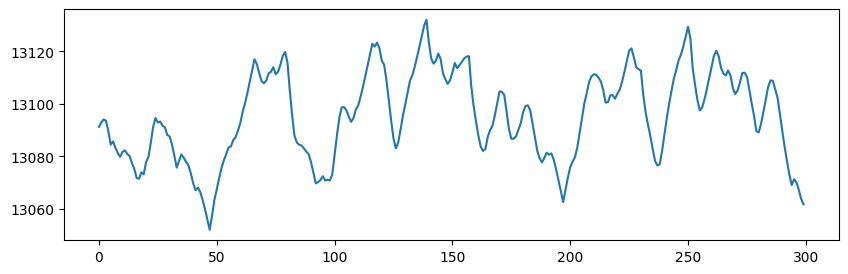

In [27]:
plt.figure(figsize=(10,3))
plt.plot(vals[-300:])